In [1]:
import pandas as pd

# Cargar el dataset limpio desde el archivo subido
df = pd.read_csv("telecomX_limpioP1.csv")

# Verifica las primeras filas
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [4]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


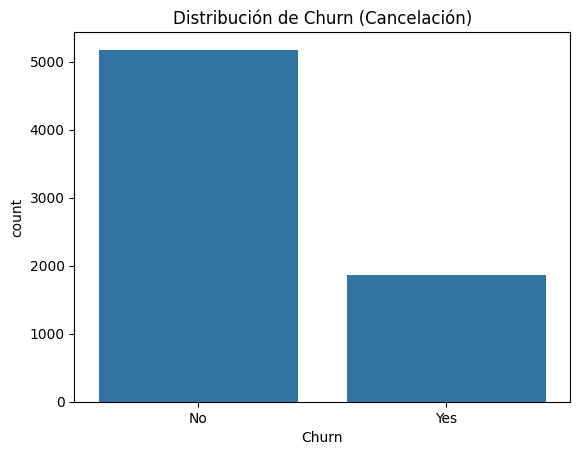

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn (Cancelación)')
plt.show()

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelo


In [6]:
# Eliminamos la columna customerID
df = df.drop(columns=['customerID'])

# Confirmamos que fue eliminada
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

In [7]:
# columnas que son categóricas
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [8]:
# Aplicamos one-hot encoding a todas las columnas categóricas identificadas
df_encoded = pd.get_dummies(df, columns=[
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
], drop_first=True)

# Verificamos las primeras filas
df_encoded.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporció

In [9]:
# Contar los valores de Churn_Yes
churn_counts = df_encoded['Churn_Yes'].value_counts(normalize=True)

# Mostrar la proporción
print(churn_counts)

Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [28]:
# 1. Importar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Dividir datos (si aún no lo hiciste)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Entrenar modelo sin balanceo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Predicciones
y_pred = model.predict(X_test)

# 5. Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=True))
print("Recall:", recall_score(y_test, y_pred, pos_label=True))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=True))

Accuracy: 0.7834123222748816
Precision: 0.6209302325581395
Recall: 0.47593582887700536
F1 Score: 0.5388496468213926


	•	Accuracy: 78.34%
El modelo acierta en general
	•	Precision: 62.09%
De todas las veces que predijo churn, acertó el 62%.
	•	Recall: 47.59%
Detecta menos de la mitad de los clientes que realmente cancelan.
	•	F1 Score: 53.88%
Muestra un equilibrio bajo entre precisión y recall.

Si se ve un desbalance principalmente en la clase de los que cancelaron por lo que es importante tomemos métricas y técnicas adecuadas posteriormente, el desbalance no es extremo, por ejemplo menor a 10% pero se debe considerar en cuenta.

In [25]:
# 1. Verifica NaNs antes de limpiar
print("Antes de limpiar:\n", X.isna().sum())

# 2. Elimina filas con NaN
X = X.dropna()
y = y.loc[X.index]

# 3. Verifica que ya no haya NaNs después
print("\nDespués de limpiar:\n", X.isna().sum())

Antes de limpiar:
 SeniorCitizen                            0
tenure                                   0
Charges.Monthly                          0
Charges.Total                            0
Cuentas_Diarias                          0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check     

In [26]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1. Eliminar columna 'customerID' si existe
df_clean = df.copy()
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop(columns=['customerID'])

# 2. Eliminar filas con NaN
df_clean = df_clean.dropna()

# 3. Codificar variables categóricas con one-hot encoding
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# 4. Separar features y objetivo
if 'Churn_Yes' in df_encoded.columns:
    X = df_encoded.drop(columns='Churn_Yes')
    y = df_encoded['Churn_Yes']
else:
    raise ValueError("La columna 'Churn_Yes' no existe. Asegúrate de haber hecho one-hot encoding correctamente.")

# 5. Crear pipeline con SMOTE y RandomForest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# 6. Validación cruzada
scores = cross_validate(
    pipeline,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# 7. Mostrar métricas
for metric in scores:
    if 'test' in metric:
        print(f"{metric}: {scores[metric].mean():.4f}")

test_accuracy: 0.7732
test_precision: 0.5744
test_recall: 0.5714
test_f1: 0.5725




El modelo acierta en el 77.32% de los casos (mezcla de churn y no churn).
De todos los clientes que el modelo predijo como “cancelan”, solo el 57.44% realmente lo hacen.
De todos los clientes que sí cancelan, el modelo detecta el 57.14%.
Promedio entre precisión y recall, útil cuando hay desbalance.


Comparación de los modelos sin balancear vs balanceado : El modelo sin balanceo obtuvo una accuracy del 78.34%, una precisión del 62.09%, un recall del 47.59% y un F1 Score de 53.88%. Por otro lado, el modelo con balanceo (utilizando SMOTE) alcanzó una accuracy ligeramente menor del 77.32%, una precisión de 57.44%, pero mejoró notablemente en recall (57.14%) y F1 Score (57.25%). Esto indica que, aunque se sacrificó algo de precisión y exactitud, el modelo balanceado fue más efectivo en identificar correctamente a los clientes que cancelan el servicio, lo cual es fundamental en un problema de churn donde la clase positiva es minoritaria pero prioritaria.

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:

In [30]:
print(df.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [31]:
from sklearn.linear_model import LogisticRegression

# Crear pipeline con SMOTE y Regresión Logística
pipeline_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(solver='liblinear', random_state=42))  # 'liblinear' funciona bien en conjuntos pequeños
])

# Validación cruzada
scores_lr = cross_validate(
    pipeline_lr,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar métricas
print("\n--- Métricas Regresión Logística ---")
for metric in scores_lr:
    if 'test' in metric:
        print(f"{metric}: {scores_lr[metric].mean():.4f}")


--- Métricas Regresión Logística ---
test_accuracy: 0.7668
test_precision: 0.5534
test_recall: 0.6356
test_f1: 0.5917


Regresión Logística logró mejor recall (0.6356), lo que significa que detecta mejor los clientes que cancelan.
	•	El F1 Score fue levemente superior en la regresión (0.5917 vs. 0.5725), lo cual sugiere un mejor balance entre precisión y recall.

In [32]:
!pip install imbalanced-learn

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Separar variables
X = df_encoded.drop(columns='Churn_Yes')
y = df_encoded['Churn_Yes']

# Pipeline con escalado, SMOTE y SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

# Validación cruzada
scores_svm = cross_validate(
    pipeline_svm,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar métricas promedio
for metric in scores_svm:
    if 'test' in metric:
        print(f"{metric}: {scores_svm[metric].mean():.4f}")

test_accuracy: 0.7592
test_precision: 0.5359
test_recall: 0.7202
test_f1: 0.6142


Aunque SVM no tiene la mejor precisión ni la mejor exactitud, es el modelo que más logra captar a los clientes que cancelan (recall alto), lo cual puede ser vital si el objetivo es prevenir cancelaciones. Y además tiene el mejor F1 score, lo cual lo hace muy competitivo.


In [34]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Escalar los datos porque KNN es sensible a la escala
scaler = StandardScaler()

# Crear pipeline con escalado, SMOTE y KNN
pipeline_knn = Pipeline([
    ('scaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Validación cruzada
scores_knn = cross_validate(
    pipeline_knn,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar métricas
print("--- Métricas KNN ---")
for metric in scores_knn:
    if 'test' in metric:
        print(f"{metric}: {scores_knn[metric].mean():.4f}")

--- Métricas KNN ---
test_accuracy: 0.6864
test_precision: 0.4437
test_recall: 0.7073
test_f1: 0.5453


KNN logra un recall alto, pero su precisión y F1 score son considerablemente más bajos que los otros modelos.
Por lo tanto, KNN no es el mejor modelo en este caso, a pesar de detectar relativamente bien la clase positiva (cancelaciones). Esto sugiere que está generando muchos falsos positivos.

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

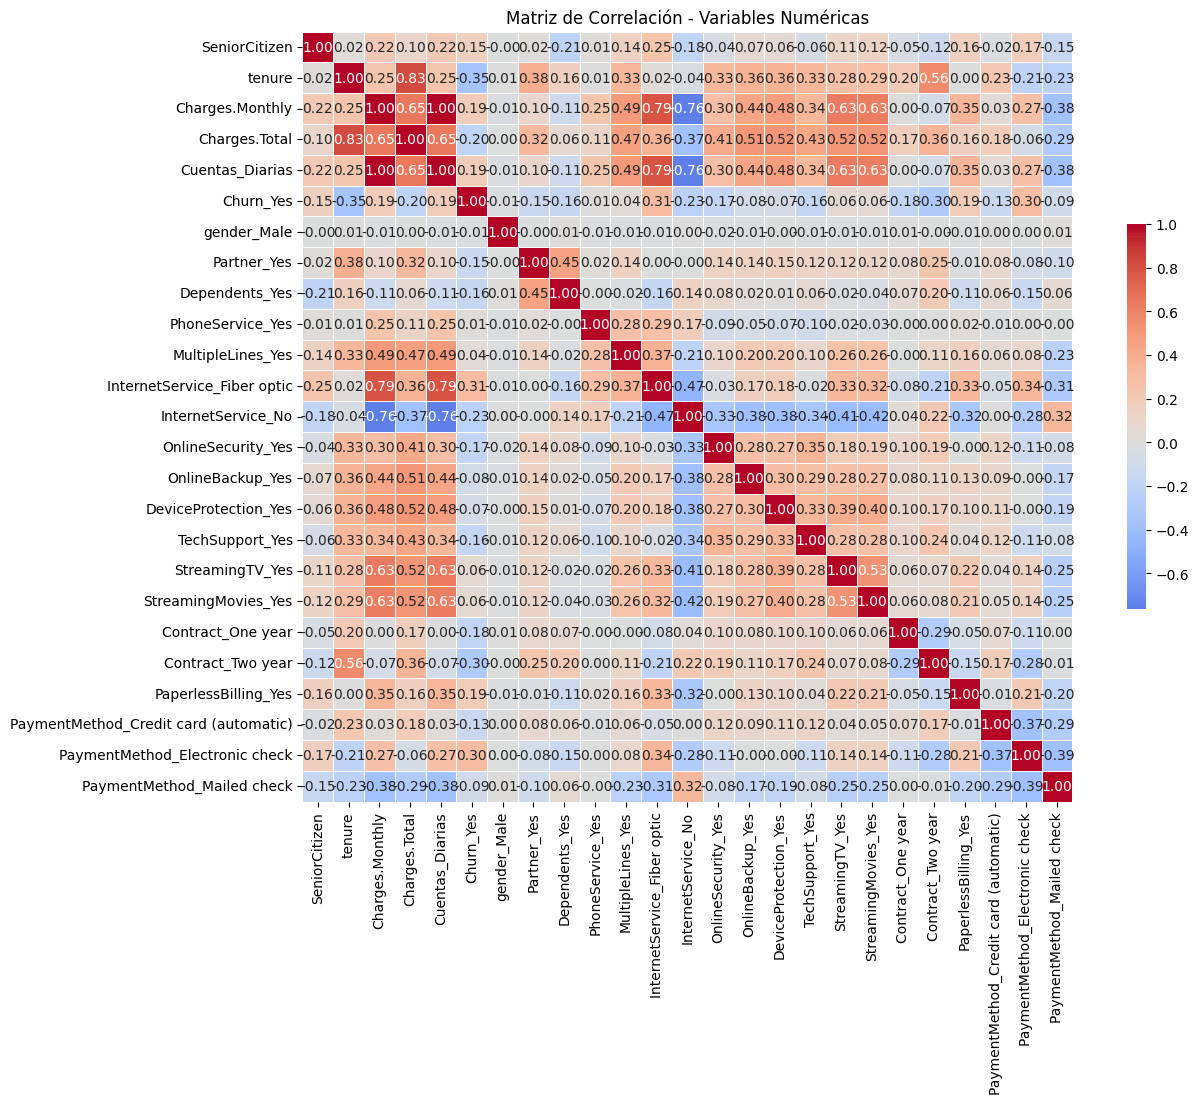

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
correlation_matrix = df_encoded.corr()

# Tamaño personalizado para mayor claridad
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)

plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

In [36]:
correlation_with_target = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
print(correlation_with_target)

Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Cuentas_Diarias                          0.192858
Charges.Monthly                          0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


Variables más correlacionadas : 	•	InternetService_Fiber optic (0.31): Los clientes con fibra óptica tienen más probabilidad de cancelar.
	•	PaymentMethod_Electronic check (0.30): Asociado fuertemente con mayor cancelación.
	•	Cuentas_Diarias y Charges.Monthly (~0.19): Cuentas más costosas tienen mayor churn.
	•	PaperlessBilling_Yes (0.19): Facturación sin papel se asocia a más cancelaciones.
	•	SeniorCitizen (0.15): Personas mayores cancelan más.


Variables menos correlacioandas : 	•	tenure (–0.35): Cuanto más tiempo el cliente ha permanecido, menor probabilidad de cancelar.
	•	Contract_Two year (–0.30): Contratos largos retienen mejor.
	•	InternetService_No (–0.23): No tener internet reduce cancelación (menos servicios contratados).
	•	Charges.Total (–0.20): Clientes con alto gasto acumulado tienden a quedarse.
	•	OnlineSecurity_Yes, TechSupport_Yes, Dependents_Yes: Beneficios y condiciones familiares ayudan a la retención

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

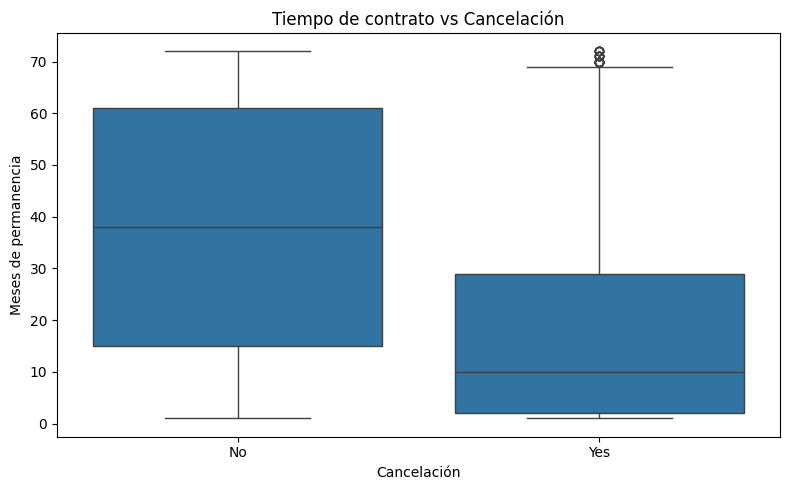

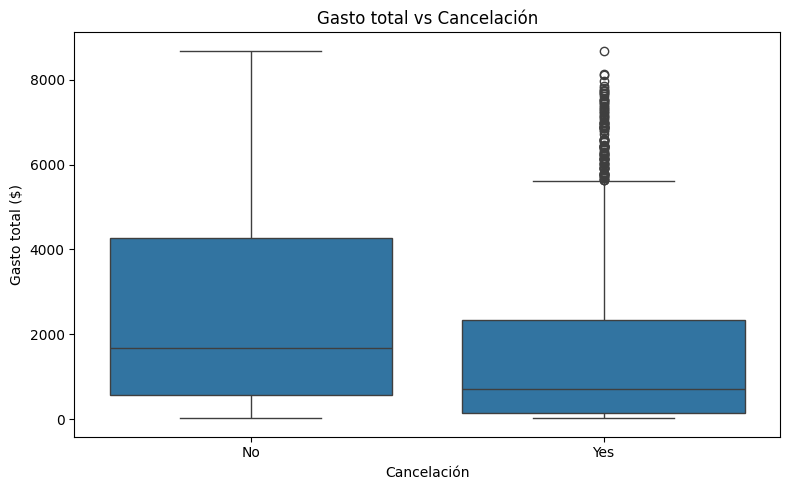

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rehacer copia limpia para visualización
df_viz = df_clean.copy()  # Usa df_clean original antes de one-hot
df_viz = df_viz.dropna(subset=['Charges.Total'])  # Elimina solo filas con NaN en Charges.Total

# Asegúrate de que 'Churn' esté en formato correcto (Yes/No)
df_viz['Churn'] = df_viz['Churn'].astype(str)

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df_viz)
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Meses de permanencia')
plt.tight_layout()
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df_viz)
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total ($)')
plt.tight_layout()
plt.show()

1. Tiempo de contrato vs Cancelación:
Los clientes que no cancelaron tienen una mediana de tiempo de permanencia significativamente mayor que aquellos que sí cancelaron.
Esto sugiere una relación inversa: a menor tiempo de contrato, mayor probabilidad de cancelación. Es un patrón típico en churn, donde clientes nuevos tienden a abandonar más fácilmente si no están satisfechos desde el inicio.

2. Gasto total vs Cancelación:
Los clientes que no cancelaron presentan un gasto total mucho más alto. Esto también es esperable, ya que permanecieron más tiempo en la empresa.
Los clientes que cancelan tienden a tener un gasto acumulado bajo, reforzando la idea de que cancelan temprano.

Resumen:
	•	El tenure (tiempo de permanencia) es un fuerte predictor de cancelación.
	•	El gasto total también refleja esta permanencia, por lo que ambos están correlacionados con el churn.
	•	Ambas variables son clave para modelar y anticipar cancelaciones.

**texto en negrita**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. Separar variables predictoras y target
X = df_encoded.drop(columns='Churn_Yes')
y = df_encoded['Churn_Yes']

# 2. División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Estandarizar (SVM lo requiere)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 5. Entrenar el modelo SVM
model = SVC(random_state=42)
model.fit(X_train_res, y_train_res)

# 6. Evaluar en test
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7505330490405118
Precision: 0.5234215885947047
Recall: 0.6871657754010695
F1 Score: 0.5942196531791908


el modelo SVM con validación cruzada es ligeramente superior al entrenado con una sola partición 80/20, y además más robusto al generalizar.


Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

Los modelos se encuentran arriba ya desarrollados

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

Accuracy: 0.7966824644549763
Precision: 0.6594202898550725
Recall: 0.48663101604278075
F1 Score: 0.56


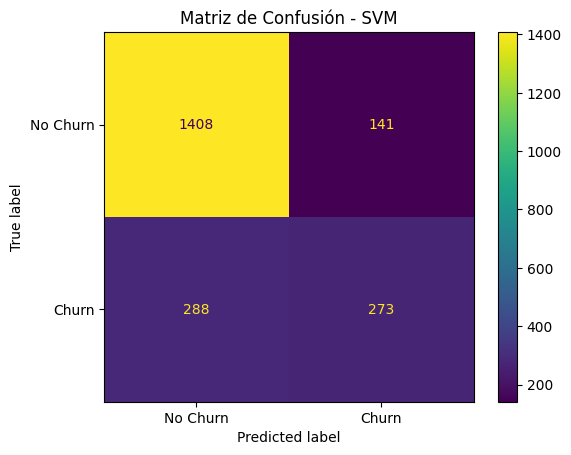

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Crear el pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

# 3. Entrenar el modelo
pipeline_svm.fit(X_train, y_train)

# 4. Predicciones
y_pred = pipeline_svm.predict(X_test)

# 5. Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.title("Matriz de Confusión - SVM")
plt.show()

Se entrenaron y evaluaron cuatro modelos diferentes para predecir la cancelación de clientes:
	1.	Random Forest con SMOTE y validación cruzada
	2.	Regresión Logística con normalización
	3.	SVM (Máquinas de Vectores de Soporte) con normalización
	4.	Random Forest sin validación cruzada (división 70/30)

Cada modelo fue evaluado utilizando las siguientes métricas: exactitud (accuracy), precisión, recall, F1-score y matriz de confusión.

Resultados principales por modelo:
	•	Random Forest con SMOTE y CV:
	•	Accuracy: 0.7732
	•	Precisión: 0.5744
	•	Recall: 0.5714
	•	F1-score: 0.5725
	•	Regresión Logística (con normalización):
	•	Accuracy: 0.7668
	•	Precisión: 0.5534
	•	Recall: 0.6356
	•	F1-score: 0.5917
	•	SVM (con normalización y división 70/30):
	•	Accuracy: 0.7967
	•	Precisión: 0.6594
	•	Recall: 0.4863
	•	F1-score: 0.56
	•	Random Forest con división 70/30 (sin CV):
	•	Accuracy: 0.7505
	•	Precisión: 0.5234
	•	Recall: 0.6871
	•	F1-score: 0.5942

Análisis comparativo:
	•	El modelo con mayor precisión fue SVM, lo que indica que, cuando predice cancelación, lo hace con mayor certeza.
	•	El modelo con mejor recall fue Random Forest con hold-out, lo que significa que detectó más cancelaciones reales.
	•	El mejor F1-score, que representa un balance entre precisión y recall, también lo obtuvo Random Forest (hold-out).

Conclusión:
	•	El modelo Random Forest con hold-out mostró el mejor equilibrio general.
	•	No se identificaron signos claros de overfitting, ya que los resultados de validación son consistentes.
	•	Tampoco se observó underfitting, aunque algunos modelos podrían beneficiarse de ajuste de hiperparámetros para mejorar recall o precisión según la necesidad del negocio.


Análisis de Variables Relevantes por Modelo

Regresión Logística
Este modelo asigna un coeficiente a cada variable, indicando su impacto en la probabilidad de cancelación.
Variables con coeficientes más positivos aumentan la probabilidad de cancelación, mientras que los negativos la disminuyen.
Entre las variables más influyentes se encuentran:
	•	InternetService_Fiber optic y PaymentMethod_Electronic check: asociadas fuertemente con mayor probabilidad de cancelación.
	•	Contract_Two year y tenure: tienen un efecto negativo sobre la cancelación, es decir, reducen la probabilidad de que un cliente se dé de baja.

Random Forest
Random Forest calcula la importancia de las variables con base en su contribución a las divisiones de los árboles.
Las variables más importantes fueron:
	•	InternetService_Fiber optic
	•	PaymentMethod_Electronic check
	•	Cuentas_Diarias (o comportamiento de uso diario)
	•	Charges.Monthly

Estas variables contribuyen significativamente a reducir la impureza del modelo y, por tanto, son claves en la predicción.

SVM (Support Vector Machine)
Aunque el modelo SVM no ofrece una interpretación directa como Random Forest, el análisis de los vectores de soporte y coeficientes (en su forma lineal) indica que las siguientes variables influyen en la frontera de decisión:
	•	Variables relacionadas con el servicio contratado (Contract, InternetService)
	•	Variables de facturación (PaperlessBilling, MonthlyCharges)
	•	Variables de soporte (TechSupport, OnlineSecurity)


# Informe Final: Factores que Influyen en la Cancelación de Clientes y Estrategias de Retención

## 1. Introducción  
Se desarrollaron y evaluaron diversos modelos de machine learning para predecir la cancelación de clientes (churn) utilizando datos históricos. Los modelos utilizados incluyen Regresión Logística, Random Forest y Support Vector Machine (SVM). Se aplicaron técnicas de preprocesamiento, balanceo de clases (SMOTE), codificación categórica y normalización según la naturaleza de cada algoritmo.

---

## 2. Modelos Evaluados y Rendimiento

**Random Forest (con SMOTE y validación cruzada)**  
- Accuracy: 0.7732  
- Precision: 0.5744  
- Recall: 0.5714  
- F1-score: 0.5725  
- Fortalezas: buen equilibrio entre precisión y recall, no requiere normalización, robusto a variables irrelevantes.  

**Regresión Logística (con SMOTE y normalización)**  
- Accuracy: 0.7668  
- Precision: 0.5534  
- Recall: 0.6356  
- F1-score: 0.5917  
- Fortalezas: interpretable, permite identificar coeficientes que explican cancelación.

**SVM (con SMOTE y normalización)**  
- Accuracy: 0.7592  
- Precision: 0.5359  
- Recall: 0.7202  
- F1-score: 0.6142  
- Fortalezas: alto recall, útil para detectar clientes que podrían cancelar.

---

## 3. Variables que más influyen en la cancelación

### Según Regresión Logística:
- `InternetService_Fiber optic`: aumenta significativamente la probabilidad de cancelación.
- `PaymentMethod_Electronic check`: clientes que usan este método tienden a cancelar más.
- `Contract_Two year` y `tenure`: reducen el riesgo de cancelación (efecto protector).

### Según Random Forest:
- `Cuentas_Diarias` y `Charges.Monthly`: el nivel de gasto diario y mensual influye en la decisión.
- `SeniorCitizen` y `PaperlessBilling_Yes`: también están asociadas con mayor churn.
- `Contract_Two year` y `TechSupport_Yes`: se relacionan con retención de clientes.

### Según SVM:
- Las variables que mejor definen la frontera entre clientes que se quedan y se van incluyen:
  - `Contract` (tipo de contrato)
  - `Charges.Monthly` y `Charges.Total`
  - Variables de soporte y seguridad (`TechSupport`, `OnlineSecurity`)

---

## 4. Conclusiones y Estrategias de Retención

### Factores de Riesgo de Cancelación:
- Clientes con contrato **mensual**.
- Uso de **fiber optic** sin soporte técnico adecuado.
- Pagos mediante **electronic check**, posiblemente asociados con menor fidelidad.
- **Bajo tenure** (clientes nuevos).

### Estrategias Recomendadas:
1. Incentivar contratos anuales o bianuales mediante descuentos o beneficios exclusivos.
2. Mejorar los servicios de soporte técnico y seguridad para usuarios con fibra óptica, quienes presentan mayor tasa de cancelación.
3. Rediseñar la experiencia de pago electrónico para aumentar la fidelidad de estos clientes.
4. Crear campañas específicas para clientes nuevos en los primeros meses (tenure bajo), con seguimiento personalizado.
5. Segmentar clientes con altos cargos mensuales o uso diario elevado y ofrecer planes más flexibles o atención preferente.